# NOM Data
This notebook demonstrates a backwards traversal of the NMDC schema using NOM data. 

In [326]:
import requests
from io import StringIO
import nom_functions as func
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import itertools
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch
from matplotlib.colors import LinearSegmentedColormap

Pull all records of data objects with NOM processed data by pulling all data objects with data_object_type “FT ICR-MS Analysis Results”. 

In [21]:
# pull all NOM data objects
processed_nom=func.get_next_results(collection='data_object_set',\
                       filter='{"data_object_type":{"$regex": "FT ICR-MS Analysis Results"}}',\
                        max_page_size=100,fields='id,md5_checksum,url')

# clarify names
for dataobject in processed_nom:
    dataobject["processed_nom_id"] = dataobject.pop("id")
    dataobject["processed_nom_md5_checksum"] = dataobject.pop("md5_checksum")
    dataobject["processed_nom_url"] = dataobject.pop("url")

# convert to df
processed_nom_df = func.convert_df(processed_nom)
processed_nom_df

,processed_nom_id,processed_nom_md5_checksum,processed_nom_url
0,nmdc:dobj-11-00dewm52,2a532dca15798e470103ebd752a0937f,https://nmdcdemo.emsl.pnnl.gov/nom/1000soils/r...
1,nmdc:dobj-11-00wm3313,3ce562ac512457ea54bdda05a4f01ede,https://nmdcdemo.emsl.pnnl.gov/nom/1000soils/r...
2,nmdc:dobj-11-01kye625,38930c28eae561bc807bd01823f04167,https://nmdcdemo.emsl.pnnl.gov/nom/1000soils/r...
3,nmdc:dobj-11-02trja88,e6bafa5fabbebfb0061aa2587e223979,https://nmdcdemo.emsl.pnnl.gov/nom/grow/result...
4,nmdc:dobj-11-0312n668,20a5193d5fb54bf2a54c54b6f95a099d,https://nmdcdemo.emsl.pnnl.gov/nom/1000soils/r...
...,...,...,...
2544,nmdc:dobj-13-zrp1qw41,98b97b78fff542b66e72f4b3f792d80f,https://nmdcdemo.emsl.pnnl.gov/nom/results/SBR...
2545,nmdc:dobj-13-zsqpnm92,3e9e19910edb209d211d9f915e36b8cb,https://nmdcdemo.emsl.pnnl.gov/nom/results/Bro...
2546,nmdc:dobj-13-zvnmsp76,aec0521d6a36a440e41052f8eadc0d1d,https://nmdcdemo.emsl.pnnl.gov/nom/results/Ung...
2547,nmdc:dobj-13-zvzx2462,9f0d52cc46d247b8d2ba12d5842b9fb6,https://nmdcdemo.emsl.pnnl.gov/nom/results/Bro...


Use the processed NOM objects' “ID” to pull the producing NOM analysis records.

In [28]:
analysis_dataobj=func.get_id_results(
                                    newest_results=processed_nom,\
                                    id_field="processed_nom_id",\
                                    query_collection="nom_analysis_activity_set",\
                                    match_id_field="has_output",\
                                    query_fields="id,has_input,has_output")

# clarify names
for dataobject in analysis_dataobj:
    dataobject["analysis_id"] = dataobject.pop("id")
    dataobject["analysis_has_input"] = dataobject.pop("has_input")
    dataobject["analysis_has_output"] = dataobject.pop("has_output")

# convert to data frame
analysis_dataobj_df = func.convert_df(analysis_dataobj)
analysis_dataobj_df



,analysis_id,analysis_has_input,analysis_has_output
0,nmdc:wfnom-11-fwhgp651.1,[nmdc:dobj-11-hrqfj247],[nmdc:dobj-11-0dn7p856]
1,nmdc:wfnom-11-snvsmz18.1,[nmdc:dobj-11-esgqw196],[nmdc:dobj-11-0bmapy68]
2,nmdc:wfnom-11-ph9mfs20.1,[nmdc:dobj-11-sj597780],[nmdc:dobj-11-04v02904]
3,nmdc:wfnom-11-x8j6qc18.1,[nmdc:dobj-11-jjmn7962],[nmdc:dobj-11-1qhx4085]
4,nmdc:wfnom-11-479gvz55.1,[nmdc:dobj-11-rq95kp39],[nmdc:dobj-11-0cf8jk36]
...,...,...,...
2544,nmdc:wfnom-13-ycxczw19.1,[nmdc:dobj-13-w9czqg70],[nmdc:dobj-13-yasv1664]
2545,nmdc:wfnom-13-b2e44434.1,[nmdc:dobj-13-aef3pw71],[nmdc:dobj-13-ykh2yk18]
2546,nmdc:wfnom-13-eb5f8063.1,[nmdc:dobj-13-b28x6912],[nmdc:dobj-13-xstcrm22]
2547,nmdc:wfnom-13-k9tdtt72.1,[nmdc:dobj-13-g1wmqa90],[nmdc:dobj-13-zkgr9031]


Use the NOM analysis records' "has_input" to pull the raw NOM data objects.

In [29]:
raw_dataobj=func.get_id_results(
                                    newest_results=analysis_dataobj,\
                                    id_field="analysis_has_input",\
                                    query_collection="data_object_set",\
                                    match_id_field="id",\
                                    query_fields="id,name")
# clarify names
for dataobject in raw_dataobj:
    dataobject["raw_id"] = dataobject.pop("id")
    dataobject["raw_name"] = dataobject.pop("name")

raw_df = func.convert_df(raw_dataobj)

raw_df

,raw_id,raw_name
0,nmdc:dobj-11-04embv91,Lybrand_FT_62_W_23Aug19_Alder_Infuse_p3_1_01_4...
1,nmdc:dobj-11-04ny1n21,Lybrand_FT_36_C_30Aug19_Alder_Infuse_p05_1_01_...
2,nmdc:dobj-11-09p17z03,Lybrand_Permafrost_BOG_14_CHCl3_13Dec19_Alder_...
3,nmdc:dobj-11-0cmhqk17,WHONDRS_S19S_0059_ICR_1_43_Alder_Inf_13Sept19_...
4,nmdc:dobj-11-0rgvyp97,WHONDRS_S19S_R33_14Sept2020_Alder_Infuse_p15_1...
...,...,...
2544,nmdc:dobj-13-ym2bx698,output: Unground_SBR_Spring_2014_FC_S2_00-10_H...
2545,nmdc:dobj-13-yscv7j32,output: Brodie_203_R2_CHCl3_05May19_Alder_Infu...
2546,nmdc:dobj-13-zazrqk87,output: Brodie_185_w_r1_01Feb19_HESI_neg
2547,nmdc:dobj-13-zjrg8w43,output: Brodie_184_H2O_11Mar19_R1_HESI_Neg


Use the raw data objects’ "ID" to pull the producing omics processing records.

In [30]:
omicsprocess_dataobj=func.get_id_results(
                                    newest_results=raw_dataobj,\
                                    id_field="raw_id",\
                                    query_collection="omics_processing_set",\
                                    match_id_field="has_output",\
                                    query_fields="id,has_input,has_output")

# clarify names
for dataobject in omicsprocess_dataobj:
    dataobject["omicsprocess_id"] = dataobject.pop("id")
    dataobject["omicsprocess_has_output"] = dataobject.pop("has_output")
    dataobject["omicsprocess_has_input"] = dataobject.pop("has_input")
# convert to data frame
omicsprocess_dataobj_df = func.convert_df(omicsprocess_dataobj)
omicsprocess_dataobj_df


,omicsprocess_id,omicsprocess_has_output,omicsprocess_has_input
0,nmdc:omprc-11-adjx8k29,[nmdc:dobj-11-04embv91],[nmdc:bsm-11-ax989290]
1,nmdc:omprc-11-w1kvtj73,[nmdc:dobj-11-04ny1n21],[nmdc:bsm-11-qvtb2v69]
2,nmdc:omprc-11-rj3bqn04,[nmdc:dobj-11-09p17z03],[nmdc:bsm-11-6aqn1d84]
3,nmdc:omprc-11-a1szxs11,[nmdc:dobj-11-0cmhqk17],[nmdc:bsm-11-b7c2dc48]
4,nmdc:omprc-11-sc2gv291,[nmdc:dobj-11-0rgvyp97],[nmdc:bsm-11-m1cbn542]
...,...,...,...
2544,nmdc:omprc-13-820dfq84,[nmdc:dobj-13-ym2bx698],[nmdc:bsm-13-rrsd4804]
2545,nmdc:omprc-11-brkhe637,[nmdc:dobj-13-yscv7j32],[nmdc:bsm-11-c2b84794]
2546,nmdc:omprc-11-5y5txf92,[nmdc:dobj-13-zazrqk87],[nmdc:bsm-11-4sw8dr23]
2547,nmdc:omprc-11-077nww93,[nmdc:dobj-13-zjrg8w43],[nmdc:bsm-11-afgbs159]


Use the omics processing records' “has_input” to pull the biosample data objects.

In [31]:
biosample_dataobj=func.get_id_results(
                                    newest_results=omicsprocess_dataobj,\
                                    id_field="omicsprocess_has_input",\
                                    query_collection="biosample_set",\
                                    match_id_field="id",\
                                    query_fields="id,name,part_of,analysis_type,geo_loc_name,env_medium")

# clarify names
for dataobject in biosample_dataobj:
    dataobject["biosample_id"] = dataobject.pop("id")

# convert to data frame
biosample_dataobj_df = func.convert_df(biosample_dataobj)

biosample_dataobj_df


,part_of,env_medium,geo_loc_name,analysis_type,name,biosample_id
0,[nmdc:sty-11-28tm5d36],{'has_raw_value': 'forest soil [ENVO:00002261]...,"{'has_raw_value': 'USA: Maryland, Winters Lane...","[metagenomics, natural organic matter]",1000 soils - WLUP_CoreB_TOP,nmdc:bsm-11-12esnc57
1,[nmdc:sty-11-db67n062],"{'has_raw_value': 'ENVO:00001998', 'term': {'i...","{'has_raw_value': 'USA: Alaska, Coldfoot'}",NaN,Lybrand_Permafrost_BOG_12_H2O,nmdc:bsm-11-17ag3b30
2,[nmdc:sty-11-8xdqsn54],"{'has_raw_value': 'ENVO:00001998', 'term': {'i...","{'has_raw_value': 'USA: ND, Stutsman'}",NaN,SanClements_NEON_HW_061,nmdc:bsm-11-26bgjj05
3,[nmdc:sty-11-28tm5d36],{'has_raw_value': 'agricultural soil [ENVO:000...,"{'has_raw_value': 'USA: Washington, Prosser No...","[metagenomics, natural organic matter]",1000 soils - PRS2_CoreB_TOP,nmdc:bsm-11-2d3eam48
4,[nmdc:sty-11-db67n062],"{'has_raw_value': 'ENVO:00001998', 'term': {'i...","{'has_raw_value': 'USA: Alaska, Healy'}",NaN,Lybrand_Permafrost_HE_02_CHCl3,nmdc:bsm-11-2n9dds87
...,...,...,...,...,...,...
2161,[nmdc:sty-11-aygzgv51],"{'has_raw_value': 'ENVO:01000017', 'term': {'i...","{'has_raw_value': 'USA: Columbia River, Washin...",NaN,Groundwater microbial communities from the Col...,nmdc:bsm-13-q0qxrf57
2162,[nmdc:sty-11-aygzgv51],"{'has_raw_value': 'ENVO:01000017', 'term': {'i...","{'has_raw_value': 'USA: Columbia River, Washin...",NaN,Groundwater microbial communities from the Col...,nmdc:bsm-13-rrsd4804
2163,[nmdc:sty-11-aygzgv51],"{'has_raw_value': 'ENVO:01000017', 'term': {'i...","{'has_raw_value': 'USA: Columbia River, Washin...",NaN,Groundwater microbial communities from the Col...,nmdc:bsm-13-tr7n0581
2164,[nmdc:sty-11-aygzgv51],"{'has_raw_value': 'ENVO:01000017', 'term': {'i...","{'has_raw_value': 'USA: Columbia River, Washin...",NaN,Groundwater microbial communities from the Col...,nmdc:bsm-13-ty597764


Extract biosample information.

In [32]:
biosample_dataobj_flat=pd.json_normalize(biosample_dataobj)
biosample_dataobj_flat_df=func.convert_df(biosample_dataobj_flat)

biosample_dataobj_flat_df['sample_type_manual']=""


biosample_dataobj_flat_df.loc[biosample_dataobj_flat_df['env_medium.term.id'].isin(["UBERON:0035118", "ENVO:00002003"]),'sample_type_manual'] = 'host'
biosample_dataobj_flat_df.loc[biosample_dataobj_flat_df['env_medium.term.id'].isin(["ENVO:00001998", "ENVO:00005774", "ENVO:00002258", "ENVO:00005778", "ENVO:00005802", 
                                "ENVO:02000059", "ENVO:00005741", "ENVO:01001841", "ENVO:00003082", "ENVO:00005800", "ENVO:01000018"]),'sample_type_manual'] = 'soil'
biosample_dataobj_flat_df.loc[biosample_dataobj_flat_df['env_medium.term.id'].isin(["ENVO:00002007", "ENVO:01000017", "ENVO:03605004", "ENVO:03605005"]),'sample_type_manual'] = 'sediment'
biosample_dataobj_flat_df.loc[biosample_dataobj_flat_df['env_medium.term.id'].isin(["ENVO:00002042", "ENVO:00002011", "ENVO:00002194", "ENVO:01001869", "ENVO:04000007"]),'sample_type_manual'] = 'water'
biosample_dataobj_flat_df.loc[biosample_dataobj_flat_df['env_medium.term.id'].isin(["ENVO:01000349", "ENVO:01001001", "ENVO:03605005"]),'sample_type_manual'] = 'plant'
biosample_dataobj_flat_df.loc[biosample_dataobj_flat_df['part_of'].isin(["nmdc:sty-11-pzmd0x14"]),'sample_type_manual'] = 'sediment'


biosample_dataobj_flat_df.loc[biosample_dataobj_flat_df['name'].str.contains('hizosphere',na=False),'sample_type_manual'] = 'plant'
biosample_dataobj_flat_df.loc[biosample_dataobj_flat_df['env_medium.term.id'].str.contains('PO:',na=False),'sample_type_manual']='plant'
biosample_dataobj_flat_df.loc[biosample_dataobj_flat_df['env_medium.term.name'].str.contains('soil',na=False),'sample_type_manual']='soil'
biosample_dataobj_flat_df.loc[biosample_dataobj_flat_df['env_medium.has_raw_value'].str.contains('soil',na=False),'sample_type_manual']='soil'
biosample_dataobj_flat_df.loc[biosample_dataobj_flat_df['env_medium.term.name'].str.contains('water',na=False),'sample_type_manual']='water'

biosample_dataobj_flat_df=biosample_dataobj_flat_df[['biosample_id','sample_type_manual']]

biosample_dataobj_flat_df

,biosample_id,sample_type_manual
0,nmdc:bsm-11-12esnc57,soil
1,nmdc:bsm-11-17ag3b30,soil
2,nmdc:bsm-11-26bgjj05,soil
3,nmdc:bsm-11-2d3eam48,soil
4,nmdc:bsm-11-2n9dds87,soil
...,...,...
2161,nmdc:bsm-13-q0qxrf57,sediment
2162,nmdc:bsm-13-rrsd4804,sediment
2163,nmdc:bsm-13-tr7n0581,sediment
2164,nmdc:bsm-13-ty597764,sediment


Create merged dataframe with schema results.

In [34]:
#match all processed nom objects (via processed_nom_id) to analysis objects (via analysis_has_output) and expand lists has_input and has_output
processed_obj_to_analysis_df=func.merge_df(processed_nom_df,analysis_dataobj_df,"processed_nom_id","analysis_has_output",[],["analysis_has_input","analysis_has_output"])

#match raw data objects (via raw_id) to all_analysis_df (via analysis_has_input)
processed_obj_to_raw_df=func.merge_df(raw_df,processed_obj_to_analysis_df,"raw_id","analysis_has_input",[],[])

#match processed_obj_to_raw_df (via raw_id) to omics processing objects (via omicsprocess_has_output) and expand lists has_input and has_output
processed_obj_to_omicsprocess_df=func.merge_df(processed_obj_to_raw_df,omicsprocess_dataobj_df,"raw_id","omicsprocess_has_output",[],["omicsprocess_has_input","omicsprocess_has_output"])

#match biosample objects (via biosample_id) to processed_obj_to_omicsprocess_df (via omicsprocess_has_input)
merged_df=func.merge_df(biosample_dataobj_flat_df,processed_obj_to_omicsprocess_df,"biosample_id","omicsprocess_has_input",[],[])

merged_df

,biosample_id,sample_type_manual,raw_id,raw_name,processed_nom_id,processed_nom_md5_checksum,processed_nom_url,analysis_id,analysis_has_input,analysis_has_output,omicsprocess_id,omicsprocess_has_output,omicsprocess_has_input
0,nmdc:bsm-11-12esnc57,soil,nmdc:dobj-11-gdhnkg66,1000S_WLUP_FTMS_SPE_TOP_3_run2_Fir_28Apr22_300...,nmdc:dobj-11-0dyc2f79,9ace043441672422f7991411014ab9cb,https://nmdcdemo.emsl.pnnl.gov/nom/1000soils/r...,nmdc:wfnom-11-xnhh0t17.1,nmdc:dobj-11-gdhnkg66,nmdc:dobj-11-0dyc2f79,nmdc:omprc-11-wj8myx84,nmdc:dobj-11-gdhnkg66,nmdc:bsm-11-12esnc57
1,nmdc:bsm-11-12esnc57,soil,nmdc:dobj-11-vkheqz50,1000S_WLUP_FTMS_SPE_TOP_1_run2_Fir_22Apr22_300...,nmdc:dobj-11-07gsmc68,9363e9de79c39013257ddb4d967006b2,https://nmdcdemo.emsl.pnnl.gov/nom/1000soils/r...,nmdc:wfnom-11-r8x4ew73.1,nmdc:dobj-11-vkheqz50,nmdc:dobj-11-07gsmc68,nmdc:omprc-11-s2590964,nmdc:dobj-11-vkheqz50,nmdc:bsm-11-12esnc57
2,nmdc:bsm-11-12esnc57,soil,nmdc:dobj-11-qt6pmm77,1000S_WLUP_FTMS_SPE_TOP_3_run1_Fir_25Apr22_300...,nmdc:dobj-11-jj2r0a49,a502ec422a6f960972b759b143d8ad9c,https://nmdcdemo.emsl.pnnl.gov/nom/1000soils/r...,nmdc:wfnom-11-edr3rn40.1,nmdc:dobj-11-qt6pmm77,nmdc:dobj-11-jj2r0a49,nmdc:omprc-11-6mbfsz04,nmdc:dobj-11-qt6pmm77,nmdc:bsm-11-12esnc57
3,nmdc:bsm-11-12esnc57,soil,nmdc:dobj-11-z002ga43,1000S_WLUP_FTMS_SPE_TOP_2_run2_Fir_22Apr22_300...,nmdc:dobj-11-mmdwds36,dff9718e9428ec3aa77fed987deb637d,https://nmdcdemo.emsl.pnnl.gov/nom/1000soils/r...,nmdc:wfnom-11-zr24j979.1,nmdc:dobj-11-z002ga43,nmdc:dobj-11-mmdwds36,nmdc:omprc-11-6ejjgv07,nmdc:dobj-11-z002ga43,nmdc:bsm-11-12esnc57
4,nmdc:bsm-11-12esnc57,soil,nmdc:dobj-11-hdd01t09,1000S_WLUP_FTMS_SPE_TOP_1_run1_Fir_22Apr22_300...,nmdc:dobj-11-s42fww29,05cf8e9c0394dbdf80c3c6b89a4f3956,https://nmdcdemo.emsl.pnnl.gov/nom/1000soils/r...,nmdc:wfnom-11-befkpb58.1,nmdc:dobj-11-hdd01t09,nmdc:dobj-11-s42fww29,nmdc:omprc-11-mcataq54,nmdc:dobj-11-hdd01t09,nmdc:bsm-11-12esnc57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9580,nmdc:bsm-13-zxqyyz58,soil,nmdc:dobj-13-y1we6577,Rachael_21T_19-87_M_03Mar17_leopard_Infuse.raw,nmdc:dobj-13-jmv5e702,03a41ac4ad0381c412b3a55b06633cfa,https://nmdcdemo.emsl.pnnl.gov/nom/results/Rac...,nmdc:wfnom-13-s9ez8969.1,nmdc:dobj-13-y1we6577,nmdc:dobj-13-jmv5e702,nmdc:omprc-13-pbbt1t23,nmdc:dobj-13-y1we6577,nmdc:bsm-13-zxqyyz58
9581,nmdc:bsm-11-hbdmpd66,soil,nmdc:dobj-13-9za40068,output: Brodie_153_w_r2_29Jan19_HESI_neg,nmdc:dobj-13-qxc45786,927a408981415d70c2111b54f37299da,https://nmdcdemo.emsl.pnnl.gov/nom/results/Bro...,nmdc:wfnom-13-meh2bb53.1,nmdc:dobj-13-9za40068,nmdc:dobj-13-qxc45786,nmdc:omprc-11-77zzn373,nmdc:dobj-13-9za40068,nmdc:bsm-11-hbdmpd66
9582,nmdc:bsm-11-hbdmpd66,soil,nmdc:dobj-13-qw6d7s16,output: Brodie_153_w_r3_31Jan19_HESI_neg,nmdc:dobj-13-sajy7y74,e8571cad964446d32e686e9e94cb106b,https://nmdcdemo.emsl.pnnl.gov/nom/results/Bro...,nmdc:wfnom-13-5csd6908.1,nmdc:dobj-13-qw6d7s16,nmdc:dobj-13-sajy7y74,nmdc:omprc-11-bgtzcs75,nmdc:dobj-13-qw6d7s16,nmdc:bsm-11-hbdmpd66
9585,nmdc:bsm-13-tk2ebg43,soil,nmdc:dobj-13-p6nbwp18,Rachael_21T_19-15_M_14Mar17_leopard_Infuse.raw,nmdc:dobj-13-n2g0fg49,8ace8bbe037be3d09031d60f12d56010,https://nmdcdemo.emsl.pnnl.gov/nom/results/Rac...,nmdc:wfnom-13-2w27bd07.1,nmdc:dobj-13-p6nbwp18,nmdc:dobj-13-n2g0fg49,nmdc:omprc-13-dsva8j03,nmdc:dobj-13-p6nbwp18,nmdc:bsm-13-tk2ebg43


Use the md5_checksum to check that each row/processed NOM object has an associated file that is unique, and remove all entries with non-unique files.

In [35]:
#identify columns to keep
column_list = merged_df.columns.tolist()
columns_to_keep = ["processed_nom_md5_checksum","processed_nom_id","raw_id","analysis_id","omicsprocess_id","biosample_id"]
columns_to_remove = list(set(column_list).difference(columns_to_keep))

# Drop unnecessary columns
merged_df_dup = merged_df.drop(columns=columns_to_remove)

#list any md5_checksum values that occur more than once (i.e. are associated with more than one processed nom id)
duplicated_checksum=merged_df_dup[merged_df_dup.duplicated('processed_nom_md5_checksum')]['processed_nom_md5_checksum'].unique()

#save info for duplicate md5_checksum entries
dup_info=merged_df_dup[merged_df_dup['processed_nom_md5_checksum'].isin(duplicated_checksum)]

#drop the processed nom ids from the original df that are associated with those duplicate md5_checksum values 
merged_df_dropdup=merged_df[~merged_df['processed_nom_md5_checksum'].isin(duplicated_checksum)]

merged_df_dropdup

,biosample_id,sample_type_manual,raw_id,raw_name,processed_nom_id,processed_nom_md5_checksum,processed_nom_url,analysis_id,analysis_has_input,analysis_has_output,omicsprocess_id,omicsprocess_has_output,omicsprocess_has_input
0,nmdc:bsm-11-12esnc57,soil,nmdc:dobj-11-gdhnkg66,1000S_WLUP_FTMS_SPE_TOP_3_run2_Fir_28Apr22_300...,nmdc:dobj-11-0dyc2f79,9ace043441672422f7991411014ab9cb,https://nmdcdemo.emsl.pnnl.gov/nom/1000soils/r...,nmdc:wfnom-11-xnhh0t17.1,nmdc:dobj-11-gdhnkg66,nmdc:dobj-11-0dyc2f79,nmdc:omprc-11-wj8myx84,nmdc:dobj-11-gdhnkg66,nmdc:bsm-11-12esnc57
1,nmdc:bsm-11-12esnc57,soil,nmdc:dobj-11-vkheqz50,1000S_WLUP_FTMS_SPE_TOP_1_run2_Fir_22Apr22_300...,nmdc:dobj-11-07gsmc68,9363e9de79c39013257ddb4d967006b2,https://nmdcdemo.emsl.pnnl.gov/nom/1000soils/r...,nmdc:wfnom-11-r8x4ew73.1,nmdc:dobj-11-vkheqz50,nmdc:dobj-11-07gsmc68,nmdc:omprc-11-s2590964,nmdc:dobj-11-vkheqz50,nmdc:bsm-11-12esnc57
2,nmdc:bsm-11-12esnc57,soil,nmdc:dobj-11-qt6pmm77,1000S_WLUP_FTMS_SPE_TOP_3_run1_Fir_25Apr22_300...,nmdc:dobj-11-jj2r0a49,a502ec422a6f960972b759b143d8ad9c,https://nmdcdemo.emsl.pnnl.gov/nom/1000soils/r...,nmdc:wfnom-11-edr3rn40.1,nmdc:dobj-11-qt6pmm77,nmdc:dobj-11-jj2r0a49,nmdc:omprc-11-6mbfsz04,nmdc:dobj-11-qt6pmm77,nmdc:bsm-11-12esnc57
3,nmdc:bsm-11-12esnc57,soil,nmdc:dobj-11-z002ga43,1000S_WLUP_FTMS_SPE_TOP_2_run2_Fir_22Apr22_300...,nmdc:dobj-11-mmdwds36,dff9718e9428ec3aa77fed987deb637d,https://nmdcdemo.emsl.pnnl.gov/nom/1000soils/r...,nmdc:wfnom-11-zr24j979.1,nmdc:dobj-11-z002ga43,nmdc:dobj-11-mmdwds36,nmdc:omprc-11-6ejjgv07,nmdc:dobj-11-z002ga43,nmdc:bsm-11-12esnc57
4,nmdc:bsm-11-12esnc57,soil,nmdc:dobj-11-hdd01t09,1000S_WLUP_FTMS_SPE_TOP_1_run1_Fir_22Apr22_300...,nmdc:dobj-11-s42fww29,05cf8e9c0394dbdf80c3c6b89a4f3956,https://nmdcdemo.emsl.pnnl.gov/nom/1000soils/r...,nmdc:wfnom-11-befkpb58.1,nmdc:dobj-11-hdd01t09,nmdc:dobj-11-s42fww29,nmdc:omprc-11-mcataq54,nmdc:dobj-11-hdd01t09,nmdc:bsm-11-12esnc57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9580,nmdc:bsm-13-zxqyyz58,soil,nmdc:dobj-13-y1we6577,Rachael_21T_19-87_M_03Mar17_leopard_Infuse.raw,nmdc:dobj-13-jmv5e702,03a41ac4ad0381c412b3a55b06633cfa,https://nmdcdemo.emsl.pnnl.gov/nom/results/Rac...,nmdc:wfnom-13-s9ez8969.1,nmdc:dobj-13-y1we6577,nmdc:dobj-13-jmv5e702,nmdc:omprc-13-pbbt1t23,nmdc:dobj-13-y1we6577,nmdc:bsm-13-zxqyyz58
9581,nmdc:bsm-11-hbdmpd66,soil,nmdc:dobj-13-9za40068,output: Brodie_153_w_r2_29Jan19_HESI_neg,nmdc:dobj-13-qxc45786,927a408981415d70c2111b54f37299da,https://nmdcdemo.emsl.pnnl.gov/nom/results/Bro...,nmdc:wfnom-13-meh2bb53.1,nmdc:dobj-13-9za40068,nmdc:dobj-13-qxc45786,nmdc:omprc-11-77zzn373,nmdc:dobj-13-9za40068,nmdc:bsm-11-hbdmpd66
9582,nmdc:bsm-11-hbdmpd66,soil,nmdc:dobj-13-qw6d7s16,output: Brodie_153_w_r3_31Jan19_HESI_neg,nmdc:dobj-13-sajy7y74,e8571cad964446d32e686e9e94cb106b,https://nmdcdemo.emsl.pnnl.gov/nom/results/Bro...,nmdc:wfnom-13-5csd6908.1,nmdc:dobj-13-qw6d7s16,nmdc:dobj-13-sajy7y74,nmdc:omprc-11-bgtzcs75,nmdc:dobj-13-qw6d7s16,nmdc:bsm-11-hbdmpd66
9585,nmdc:bsm-13-tk2ebg43,soil,nmdc:dobj-13-p6nbwp18,Rachael_21T_19-15_M_14Mar17_leopard_Infuse.raw,nmdc:dobj-13-n2g0fg49,8ace8bbe037be3d09031d60f12d56010,https://nmdcdemo.emsl.pnnl.gov/nom/results/Rac...,nmdc:wfnom-13-2w27bd07.1,nmdc:dobj-13-p6nbwp18,nmdc:dobj-13-n2g0fg49,nmdc:omprc-13-dsva8j03,nmdc:dobj-13-p6nbwp18,nmdc:bsm-13-tk2ebg43


Clean up final dataframe, removing unneeded/intermediate identifier columns.

In [36]:
column_list = merged_df_dropdup.columns.tolist()
columns_to_keep = ["biosample_id","processed_nom_id","sample_type_manual","processed_nom_url"]
columns_to_remove = list(set(column_list).difference(columns_to_keep))

# Drop unnecessary columns
merged_df_dropdup_cleaned = merged_df_dropdup.drop(columns=columns_to_remove)

# remove duplicate rows when keeping only necessary columns (should remove none)
merged_df_dropdup_cleaned.drop_duplicates(keep="first", inplace=True)

# check rows when we reagrregate/implode
final_df = merged_df_dropdup_cleaned.groupby(["biosample_id","processed_nom_id","sample_type_manual"]).agg({"processed_nom_url": list}).reset_index()

#convert url into string
final_df["processed_nom_url"] = final_df["processed_nom_url"].apply(lambda x: ', '.join(map(str, x)))
final_df


,biosample_id,processed_nom_id,sample_type_manual,processed_nom_url
0,nmdc:bsm-11-01bbrr08,nmdc:dobj-11-hgk6yw09,soil,https://nmdcdemo.emsl.pnnl.gov/nom/grow/result...
1,nmdc:bsm-11-01jah904,nmdc:dobj-11-yckycq51,soil,https://nmdcdemo.emsl.pnnl.gov/nom/grow/result...
2,nmdc:bsm-11-01vt2q72,nmdc:dobj-11-nwbr1695,soil,https://nmdcdemo.emsl.pnnl.gov/nom/grow/result...
3,nmdc:bsm-11-03dy0348,nmdc:dobj-11-68pygy27,soil,https://nmdcdemo.emsl.pnnl.gov/nom/1000soils/r...
4,nmdc:bsm-11-03dy0348,nmdc:dobj-11-e5mxyn30,soil,https://nmdcdemo.emsl.pnnl.gov/nom/1000soils/r...
...,...,...,...,...
2541,nmdc:bsm-13-zr9dcy94,nmdc:dobj-13-4k8vqy39,soil,https://nmdcdemo.emsl.pnnl.gov/nom/results/Rac...
2542,nmdc:bsm-13-zr9dcy94,nmdc:dobj-13-5f09m942,soil,https://nmdcdemo.emsl.pnnl.gov/nom/results/Rac...
2543,nmdc:bsm-13-zxqyyz58,nmdc:dobj-13-hy6n1463,soil,https://nmdcdemo.emsl.pnnl.gov/nom/results/Rac...
2544,nmdc:bsm-13-zxqyyz58,nmdc:dobj-13-j0nwnf78,soil,https://nmdcdemo.emsl.pnnl.gov/nom/results/Rac...


Calculate quality control stats for processed NOM data (this takes a while to run). 
In each file, if there are multiple matches for a peak then filter to the match with the highest confidence score. 
Calculate median confidence score, % of peaks assigned, # of peaks assigned and # of peaks found in each file.

In [37]:
errors = {}
iteration_counter = 0
#test_final_df=final_df[:100]
output=[]

for index, row in final_df.iterrows():

    iteration_counter += 1

    # print an update for every 50 iterations
    if iteration_counter % 50 == 0:
        print(f"Processed {iteration_counter} rows")
    
    url = row["processed_nom_url"]
    biosample = row["biosample_id"]
    processed=row['processed_nom_id']
    sample_type=row['sample_type_manual']

    try:
        
        # get file results
        response = requests.get(url)
        csv_data = StringIO(response.text)
        csv_df = pd.read_csv(csv_data)
        csv_data.close()

        # check if any peaks (m/z) have multiple matches. if so take highest scoring match
        #list of peaks
        peak_matches=csv_df["m/z"]
        #list of duplicated peaks in csv_df
        dup_peaks=peak_matches[peak_matches.duplicated()]
        #if there are duplicate peaks in the df, choose highest confidence score to keep
        if len(dup_peaks) > 0:
            #group df by peak and filter to max confidence score then merge with original df to filter duplicate peak entries
            idx = csv_df.groupby('m/z')['Confidence Score'].max()
            csv_df=csv_df.merge(idx,on=['m/z','Confidence Score'])

        # calculate stats and gather molecular formulas that were identified
        median_cs=csv_df['Confidence Score'].median()
        #above excludes nan values!! change if wanted
        unassigned=csv_df['Molecular Formula'].isnull().sum()
        assigned=csv_df['Molecular Formula'].count()
        assigned_perc=assigned/(unassigned+assigned)
        mol_form=csv_df["Molecular Formula"].unique()

        # Add stats as dictionary to output list (list of dicts)
        output.append({'biosample':biosample,'processed':processed,'sample_type':sample_type,'url':url,'median_cs':median_cs,'unassigned':unassigned,'assigned':assigned,'assigned_perc':assigned_perc,'mol_formulas':mol_form})
 
    except Exception as e:
        print(f"An error occurred: {e}")
        errors["biosample_id"] = biosample
        errors["url"] = url
        continue

qc_summary=pd.DataFrame(output)


Processed 50 rows
Processed 100 rows
Processed 150 rows
Processed 200 rows
Processed 250 rows
Processed 300 rows
Processed 350 rows
Processed 400 rows
Processed 450 rows
Processed 500 rows
Processed 550 rows
Processed 600 rows
Processed 650 rows
Processed 700 rows
Processed 750 rows
Processed 800 rows
Processed 850 rows
Processed 900 rows
Processed 950 rows
Processed 1000 rows
Processed 1050 rows
Processed 1100 rows
Processed 1150 rows
Processed 1200 rows
Processed 1250 rows
Processed 1300 rows
Processed 1350 rows
Processed 1400 rows
Processed 1450 rows
Processed 1500 rows
Processed 1550 rows
Processed 1600 rows
Processed 1650 rows
Processed 1700 rows
Processed 1750 rows
Processed 1800 rows
Processed 1850 rows
Processed 1900 rows
Processed 1950 rows
Processed 2000 rows
Processed 2050 rows
Processed 2100 rows
Processed 2150 rows
Processed 2200 rows
Processed 2250 rows
Processed 2300 rows
Processed 2350 rows


/Users/ober845/Library/CloudStorage/OneDrive-PNNL/Desktop/nmdc_notebooks/venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Processed 2400 rows
Processed 2450 rows
Processed 2500 rows


Assess distribution of percent of peaks assigned from each nom dataset

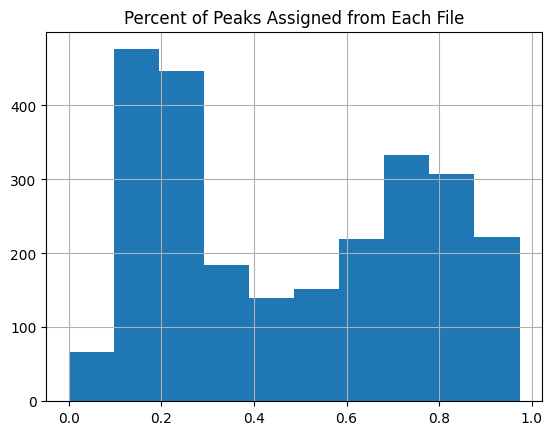

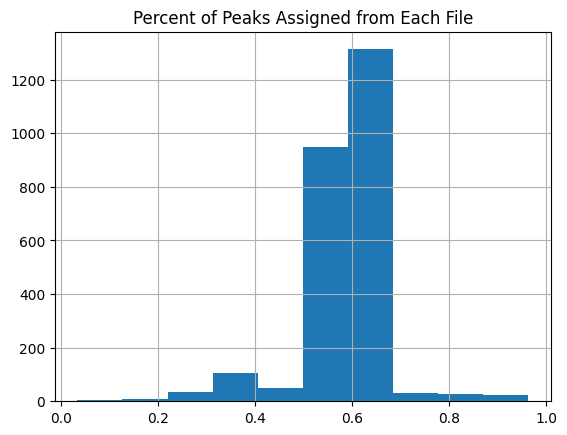

In [212]:

qc_summary.hist("assigned_perc")
plt.title('Percent of Peaks Assigned from Each File')
plt.show()

qc_summary.hist("median_cs")
plt.title('Percent of Peaks Assigned from Each File')
plt.show()


Filter to high quality nom data sets with an assigned peak percentage higher than 30% 

In [128]:
qc_filt=qc_summary[qc_summary['assigned_perc']>0.30]

qc_filt_counts=qc_filt.value_counts('sample_type')

qc_filt_counts

sample_type
soil        1387
sediment     122
water         33
Name: count, dtype: int64

Randomly sample 30 from each sample type

In [129]:
sample_types=qc_filt_counts.index.tolist()
qc_filt_sample=[]
for type in sample_types:
    qc_type=qc_filt[qc_filt['sample_type']==type]
    qc_type=qc_type.sample(n=30, random_state=2)
    qc_filt_sample.append(qc_type)

qc_filt_sample=pd.concat(qc_filt_sample)

qc_filt_sample

,biosample,processed,sample_type,url,median_cs,unassigned,assigned,assigned_perc,mol_formulas
1585,nmdc:bsm-11-ny4dem76,nmdc:dobj-11-eap5r016,soil,https://nmdcdemo.emsl.pnnl.gov/nom/1000soils/r...,0.598349,1592,4585,0.742270,"[C7 H6 O2, C6 H8 O3, C7 H12 O2, C6 H10 O3, C5 ..."
287,nmdc:bsm-11-3d7gwr49,nmdc:dobj-13-sa2mc634,soil,https://nmdcdemo.emsl.pnnl.gov/nom/results/Bro...,0.597315,99,251,0.717143,"[C14 H22 O2, C7 H12 O6 S1, C10 H13 O3 S1 N1, C..."
2458,nmdc:bsm-13-ncs25r94,nmdc:dobj-13-371fx262,soil,https://nmdcdemo.emsl.pnnl.gov/nom/results/Rac...,0.599732,21,48,0.695652,"[C16 H32 O2, C18 H36 O2, C20 H40 O2, C20 H40 O..."
1496,nmdc:bsm-11-n0cjbs26,nmdc:dobj-11-7g9bv523,soil,https://nmdcdemo.emsl.pnnl.gov/nom/1000soils/r...,0.599922,193,1986,0.911427,"[C6 H10 O3, C7 H6 O3, C9 H7 O1 N1, C8 H8 O3, C..."
687,nmdc:bsm-11-9g8bft03,nmdc:dobj-11-ygt8h503,soil,https://nmdcdemo.emsl.pnnl.gov/nom/1000soils/r...,0.595695,4156,2610,0.385752,"[C6 H8 O3, C7 H12 O2, C5 H6 O4, C6 H10 O3, C7 ..."
...,...,...,...,...,...,...,...,...,...
2005,nmdc:bsm-11-vhqj7q61,nmdc:dobj-11-s4zv7t24,water,https://nmdcdemo.emsl.pnnl.gov/nom/grow/result...,0.596122,6939,5427,0.438865,"[C42 H31 O20 S1 N1, C60 H100 O3 S1, C63 H80 O2..."
1962,nmdc:bsm-11-v6herz91,nmdc:dobj-11-ky4x8c12,water,https://nmdcdemo.emsl.pnnl.gov/nom/grow/result...,0.591859,8393,3794,0.311315,"[C45 H27 O20 N1, C58 H76 O8, C40 H68 O22, C45 ..."
1193,nmdc:bsm-11-hnhtzq79,nmdc:dobj-11-3vy77608,water,https://nmdcdemo.emsl.pnnl.gov/nom/grow/result...,0.587863,8999,3964,0.305793,"[C47 H16 O18 S1, C56 H69 O7 S1 N1, C55 H65 O8 ..."
696,nmdc:bsm-11-9rcrwz04,nmdc:dobj-11-v6vzh388,water,https://nmdcdemo.emsl.pnnl.gov/nom/grow/result...,0.598679,1820,2211,0.548499,"[C50 H81 O12 N1, C38 H55 O20 N1, C42 H65 O16 N..."


Filter to molecular formulas present in minimum number of data sets

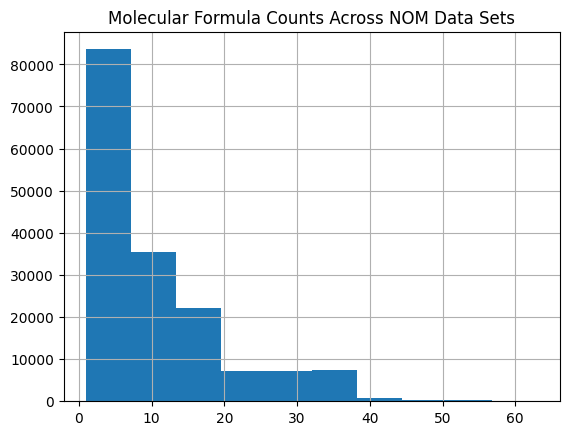

,biosample,processed,sample_type,url,median_cs,unassigned,assigned,assigned_perc,formula_count,mol_formulas
0,nmdc:bsm-11-07spy989,nmdc:dobj-13-vegw3r50,soil,https://nmdcdemo.emsl.pnnl.gov/nom/results/Bro...,0.599748,72,232,0.763158,21,"[C17 H34 O4 13C1, C24 H48 O3]"
1,nmdc:bsm-11-07spy989,nmdc:dobj-13-vegw3r50,soil,https://nmdcdemo.emsl.pnnl.gov/nom/results/Bro...,0.599748,72,232,0.763158,22,"[C17 H32 O4, C27 H41 O6 N1]"
2,nmdc:bsm-11-07spy989,nmdc:dobj-13-vegw3r50,soil,https://nmdcdemo.emsl.pnnl.gov/nom/results/Bro...,0.599748,72,232,0.763158,24,[C13 H24 O13]
3,nmdc:bsm-11-07spy989,nmdc:dobj-13-vegw3r50,soil,https://nmdcdemo.emsl.pnnl.gov/nom/results/Bro...,0.599748,72,232,0.763158,25,[C12 H22 O11]
4,nmdc:bsm-11-07spy989,nmdc:dobj-13-vegw3r50,soil,https://nmdcdemo.emsl.pnnl.gov/nom/results/Bro...,0.599748,72,232,0.763158,26,"[C16 H28 O4, C16 H32 O4]"
...,...,...,...,...,...,...,...,...,...,...
1891,nmdc:bsm-13-z9wten89,nmdc:dobj-13-0d3xxd71,sediment,https://nmdcdemo.emsl.pnnl.gov/nom/results/SBR...,0.522470,128,57,0.308108,50,[C16 H32 O2]
1892,nmdc:bsm-13-z9wten89,nmdc:dobj-13-0d3xxd71,sediment,https://nmdcdemo.emsl.pnnl.gov/nom/results/SBR...,0.522470,128,57,0.308108,51,[C18 H36 O2]
1893,nmdc:bsm-13-z9wten89,nmdc:dobj-13-0d3xxd71,sediment,https://nmdcdemo.emsl.pnnl.gov/nom/results/SBR...,0.522470,128,57,0.308108,52,[C16 H26 O4 13C1]
1894,nmdc:bsm-13-z9wten89,nmdc:dobj-13-0d3xxd71,sediment,https://nmdcdemo.emsl.pnnl.gov/nom/results/SBR...,0.522470,128,57,0.308108,55,[C17 H28 O3 S1]


In [141]:
#list all molecular formulas next to the processed nom id in which they were found, dropping nas which came from rows with no molecular formulas matching
sampled_formulas=qc_filt_sample.explode('mol_formulas').dropna()

#count the number of times each molecular formula appears
formula_count=dict(sampled_formulas.value_counts('mol_formulas'))

#create new column copying target (mol formula) then map the counts to the target
sampled_formulas['formula_count']=sampled_formulas['mol_formulas']
sampled_formulas['formula_count']=sampled_formulas['formula_count'].map(formula_count)

#histogram of molecular formula counts
sampled_formulas.hist("formula_count")
plt.title('Molecular Formula Counts Across NOM Data Sets')
plt.show()

#filter to formulas in more than 10 samples
filt_samp_form=sampled_formulas[sampled_formulas['formula_count']>20]

#relist formulas
group_cols = filt_samp_form.columns.tolist()
group_cols.remove("mol_formulas")
filt_samp_form = filt_samp_form.groupby(group_cols).agg({"mol_formulas": list}).reset_index()
filt_samp_form

Create heatmap of molecular formulas in each processed NOM data object.

/Users/ober845/Library/CloudStorage/OneDrive-PNNL/Desktop/nmdc_notebooks/venv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/ober845/Library/CloudStorage/OneDrive-PNNL/Desktop/nmdc_notebooks/venv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


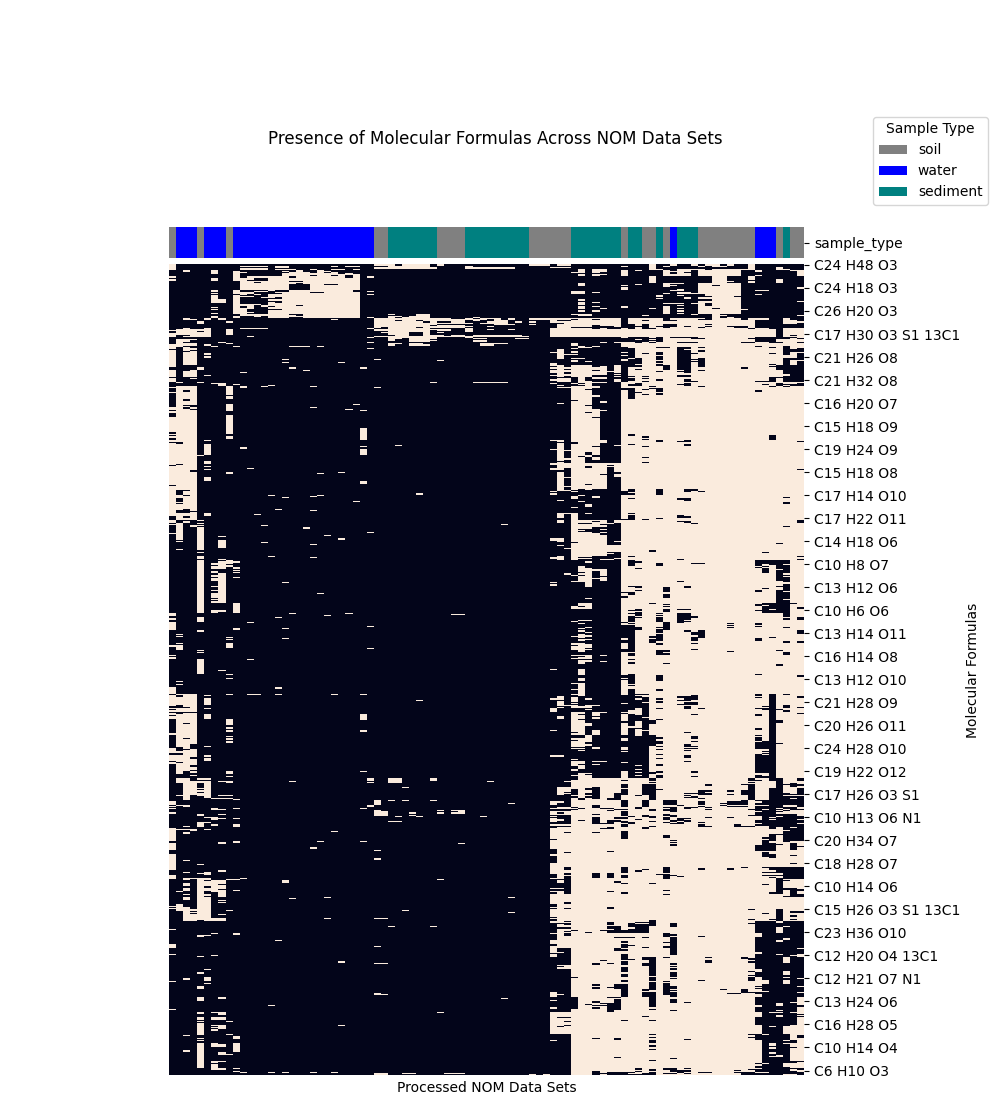

In [403]:
#list all molecular formulas next to the processed nom id in which they were found, dropping nas which came from rows with no molecular formulas matching
formula_nom=filt_samp_form[['processed','sample_type','mol_formulas']].explode('mol_formulas').dropna()

#add column indicating presence in that processed nom id
formula_nom['presence']=1

#set colors for each processed id
type_col=pd.DataFrame({'sample_type':formula_nom['sample_type'].unique(),'color':['grey','b','teal']})
sample_type=formula_nom[['sample_type','processed']].drop_duplicates()
sample_type_col=sample_type.merge(type_col,how='left',on='sample_type').set_index('processed').drop('sample_type',axis=1).rename(columns={'color':'sample_type'})

#create presence/absence matrix
formula_matrix=formula_nom.pivot_table('presence', index='mol_formulas', columns='processed').fillna(0).astype(int)

#setup color legend for sample type
type_col = dict(zip(type_col['sample_type'].unique(), ['grey','b','teal']))
handles = [Patch(facecolor=type_col[name]) for name in type_col]

#heatmap
g=sns.clustermap(data=formula_matrix,col_colors=sample_type_col,tree_kws={"linewidths": 0.},xticklabels=False,cmap='rocket',cbar_pos=None)
g.figure.suptitle("Presence of Molecular Formulas Across NOM Data Sets")
g.ax_heatmap.set_xlabel("Processed NOM Data Sets")
g.ax_heatmap.set_ylabel("Molecular Formulas")
g.figure.subplots_adjust(top=1.1)
plt.legend(handles, type_col, title='Sample Type',
           bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)